# MPMS data visualization

This notebook visualizes data from AC low-temperature experiments conducted on an MPMS instrument and exported to MagIC format.

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import pmagpy.ipmag as ipmag
import rockmag as rmag
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import measurements

After having run the [rockmag_data_unpack.ipynb](./rockmag_data_unpack.ipynb) notebook, the folder `./example_data/ECMB`, has a measurements table. We can import that table for analysis into a DataFrame that we will call `measurements`.

In [5]:
magic_id='16457'
directory = './example_data/Tiva_Canyon_tuff'
result, magic_file_name = ipmag.download_magic_from_id(magic_id, directory = directory)

In [7]:
ipmag.unpack_magic(magic_file_name, dir_path = directory)

working on:  'contribution\r'
1  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/contribution.txt
  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/contribution.txt
working on:  'locations\r'
5  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/locations.txt
  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/locations.txt
working on:  'sites\r'
4  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/sites.txt
  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/sites.txt
working on:  'samples\r'
5  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/samples.txt
  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/Tiva_Canyon_tuff/sampl

True

## Plot data

Getting started by looking at code in https://pmagpy.github.io/PmagPy-docs/documentation_notebooks/PmagPy_plots_analysis.html#chi-magic

In [9]:
measurements_path = directory + '/measurements.txt'

In [10]:
ipmag.chi_magic(measurements_path, save_plots=False)

AttributeError: 'DataFrame' object has no attribute 'susc_chi_volume'

<Figure size 1200x1200 with 0 Axes>

In [11]:
# read in data from data model 3 example file using pandas
chi_data=pd.read_csv(measurements_path,sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())

Index(['citations', 'experiment', 'instrument_codes', 'magn_mass',
       'meas_field_ac', 'meas_field_dc', 'meas_freq', 'meas_orient_phi',
       'meas_orient_theta', 'meas_temp', 'measurement', 'method_codes',
       'quality', 'specimen', 'standard', 'susc_chi_mass', 'susc_chi_qdr_mass',
       'timestamp', 'treat_dc_field', 'treat_step_num'],
      dtype='object')


In [12]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

AttributeError: 'DataFrame' object has no attribute 'susc_chi_volume'

### Extract MPMS data for a single specimen

We can now extract the MPMS data for a specific specimen.

First, we need to define the specimen for which we are extracting the data. To do this, we set `specimen_name` to be equal to a string (i.e. the specimen name within quotation marks).

Then, we can apply the `rmag.extract_mpms_data` function to extract the data for that specimen.

In [7]:
specimen_name = 'NED4-1c'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)

### Plot the data for a single specimen

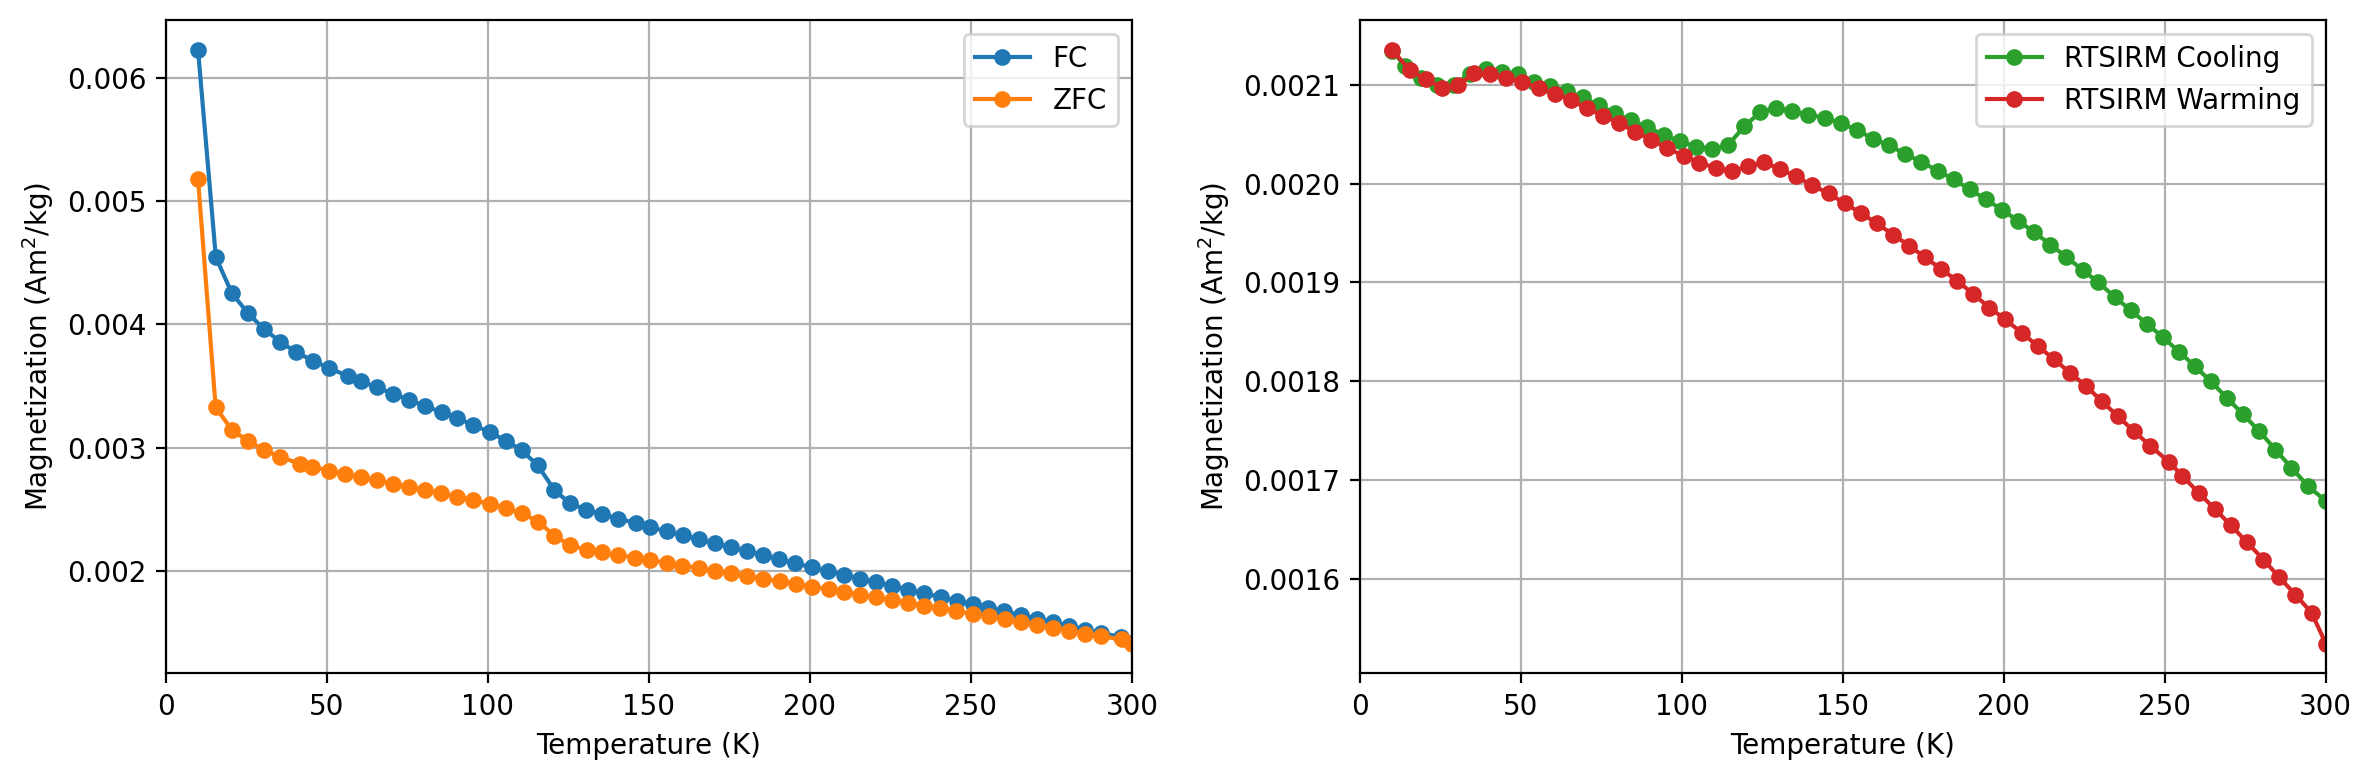

In [8]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data)

### Plot the derivative

By setting `plot_derivative=True`, the derivative of the experimental data will be calculated and plotted. 

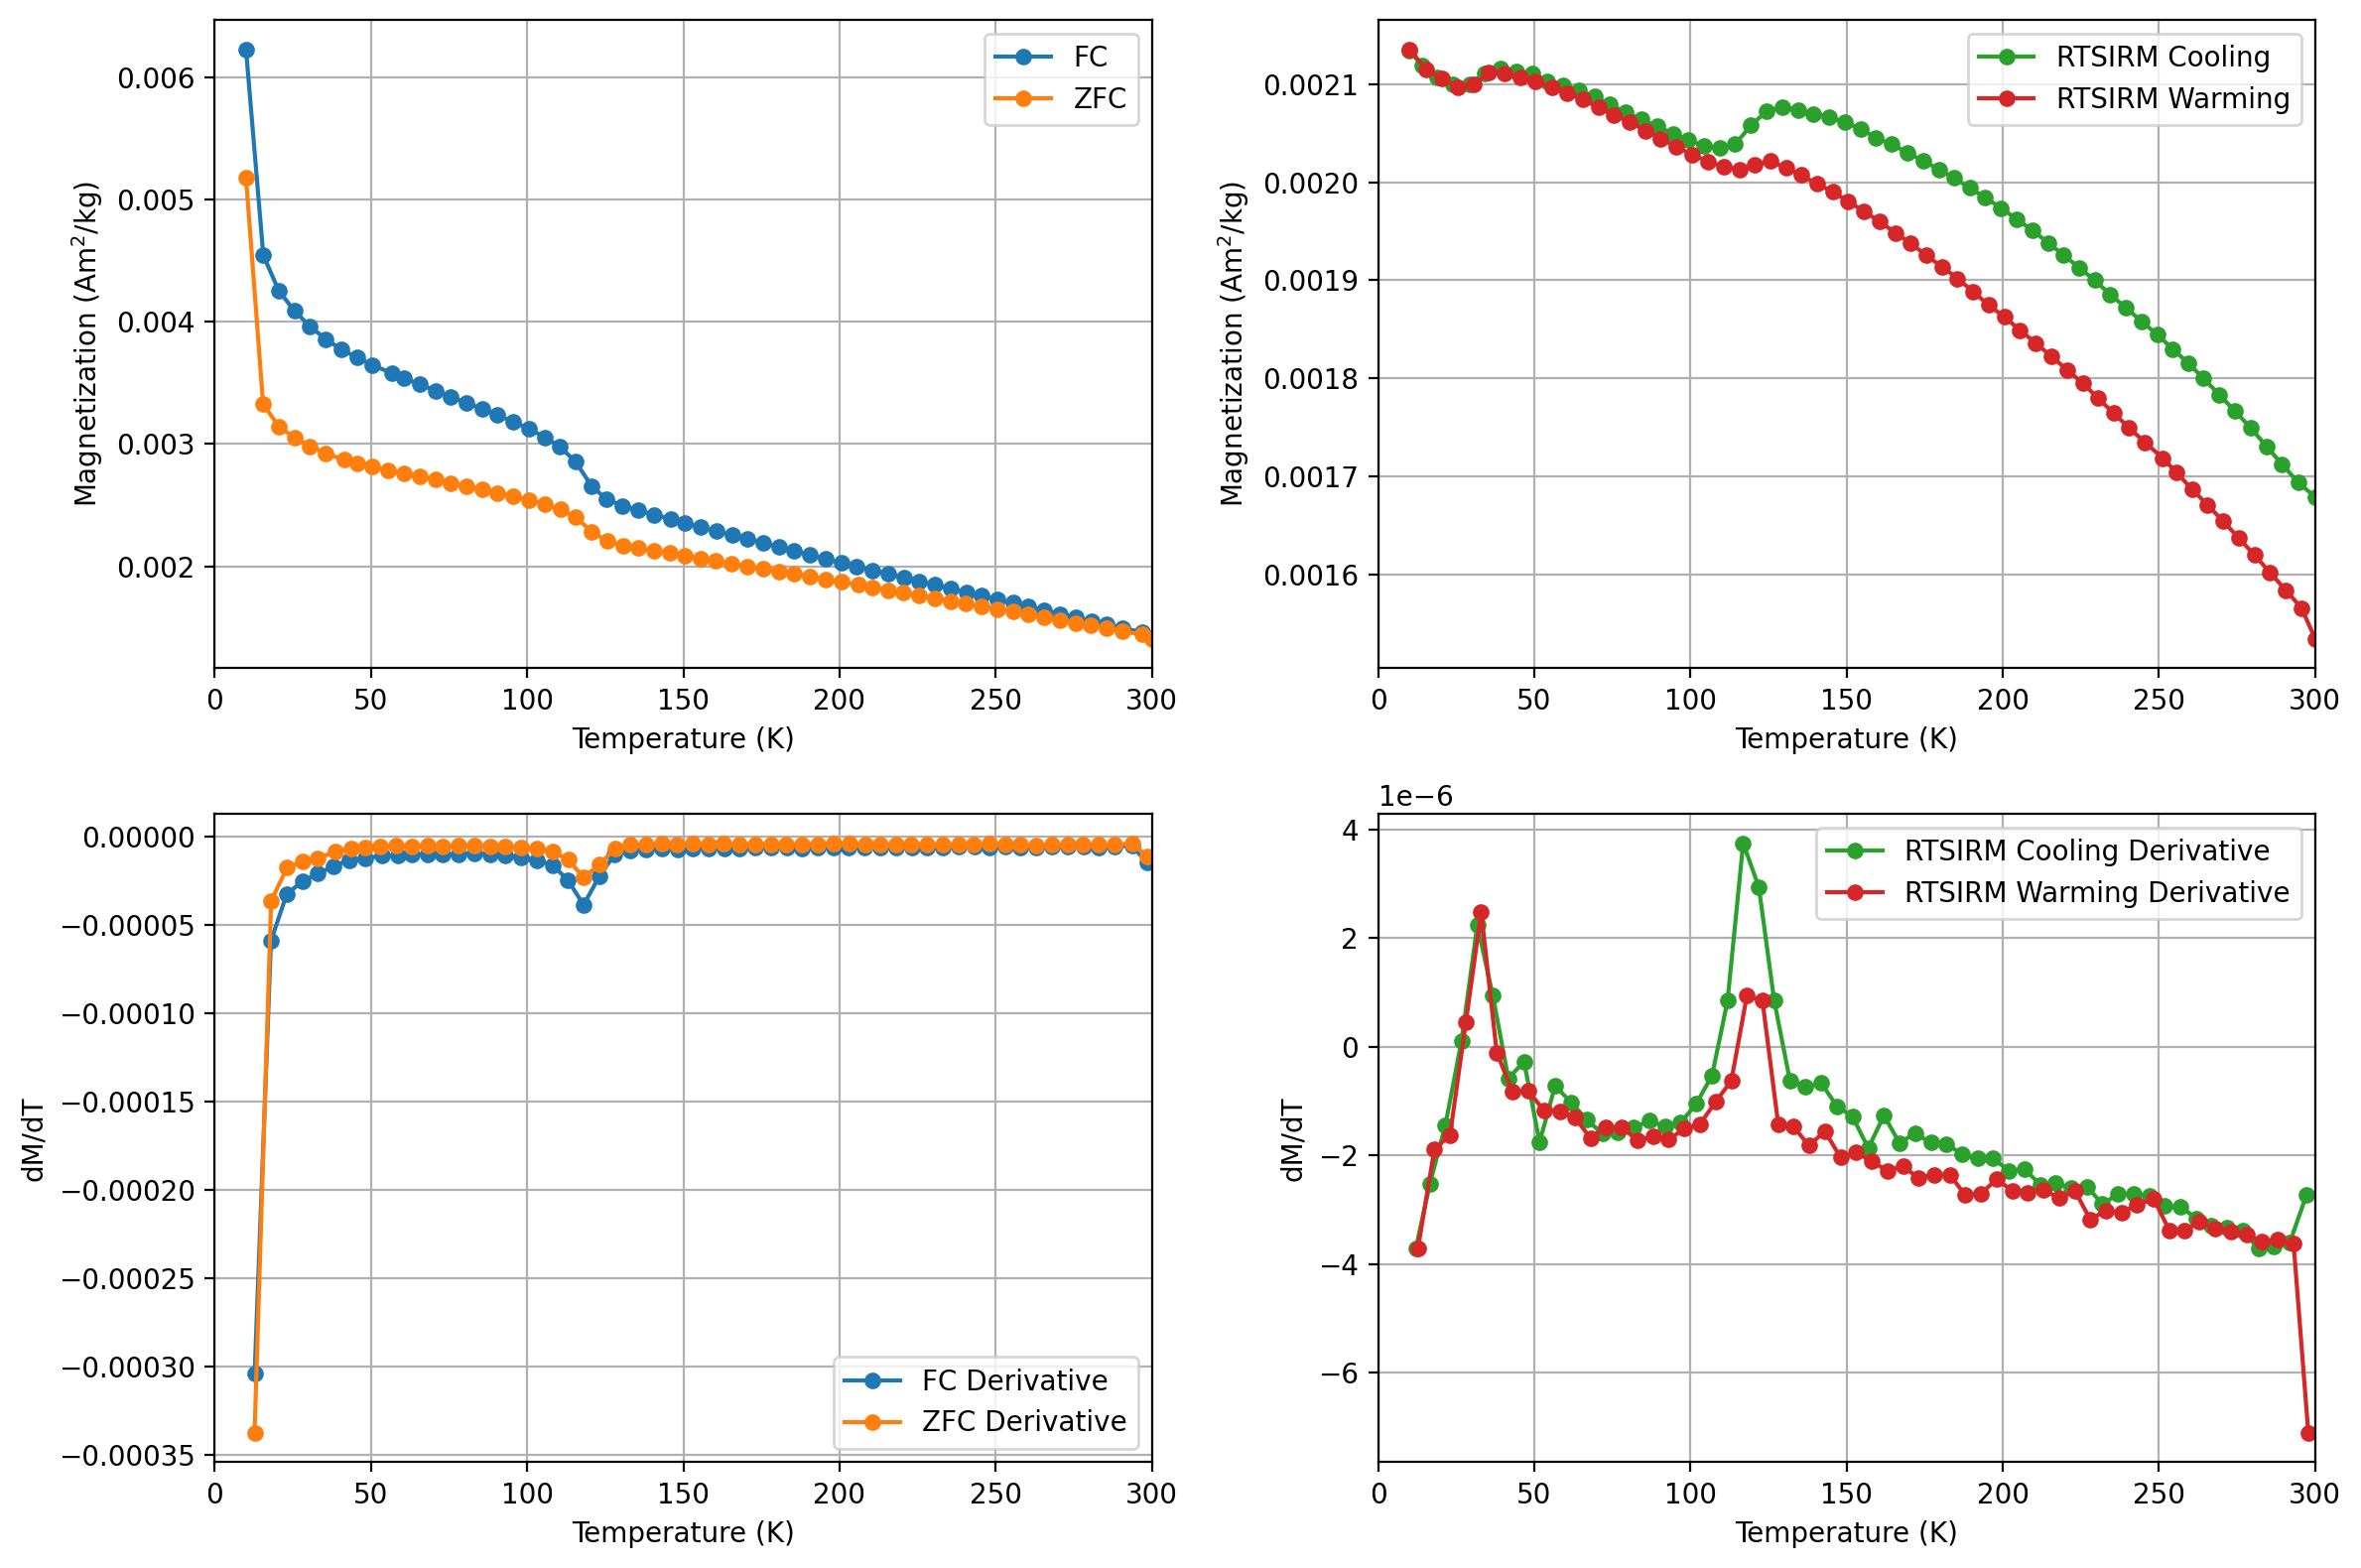

In [9]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, plot_derivative=True)

### Make interactive plots

Rather than the static plots made above (which are made using matplotlib), you may want to make interactive plots. This can be done by putting in the parameter `use_plotly=True` which generates plots using Plotly.

In [10]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, use_plotly=True)

In [11]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, use_plotly=True, plot_derivative=True)

The colors and symbols of the plots can be customized by providing other values than the default parameters as in the example below:

In [12]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, 
                   fc_color='orange', zfc_color='purple', rtsirm_cool_color='blue', rtsirm_warm_color='darkred',
                   fc_marker='^', zfc_marker='o', rtsirm_cool_marker='*', rtsirm_warm_marker='s',
                   symbol_size=5, use_plotly=True)

This customization can also be applied to Matplotlib plots:

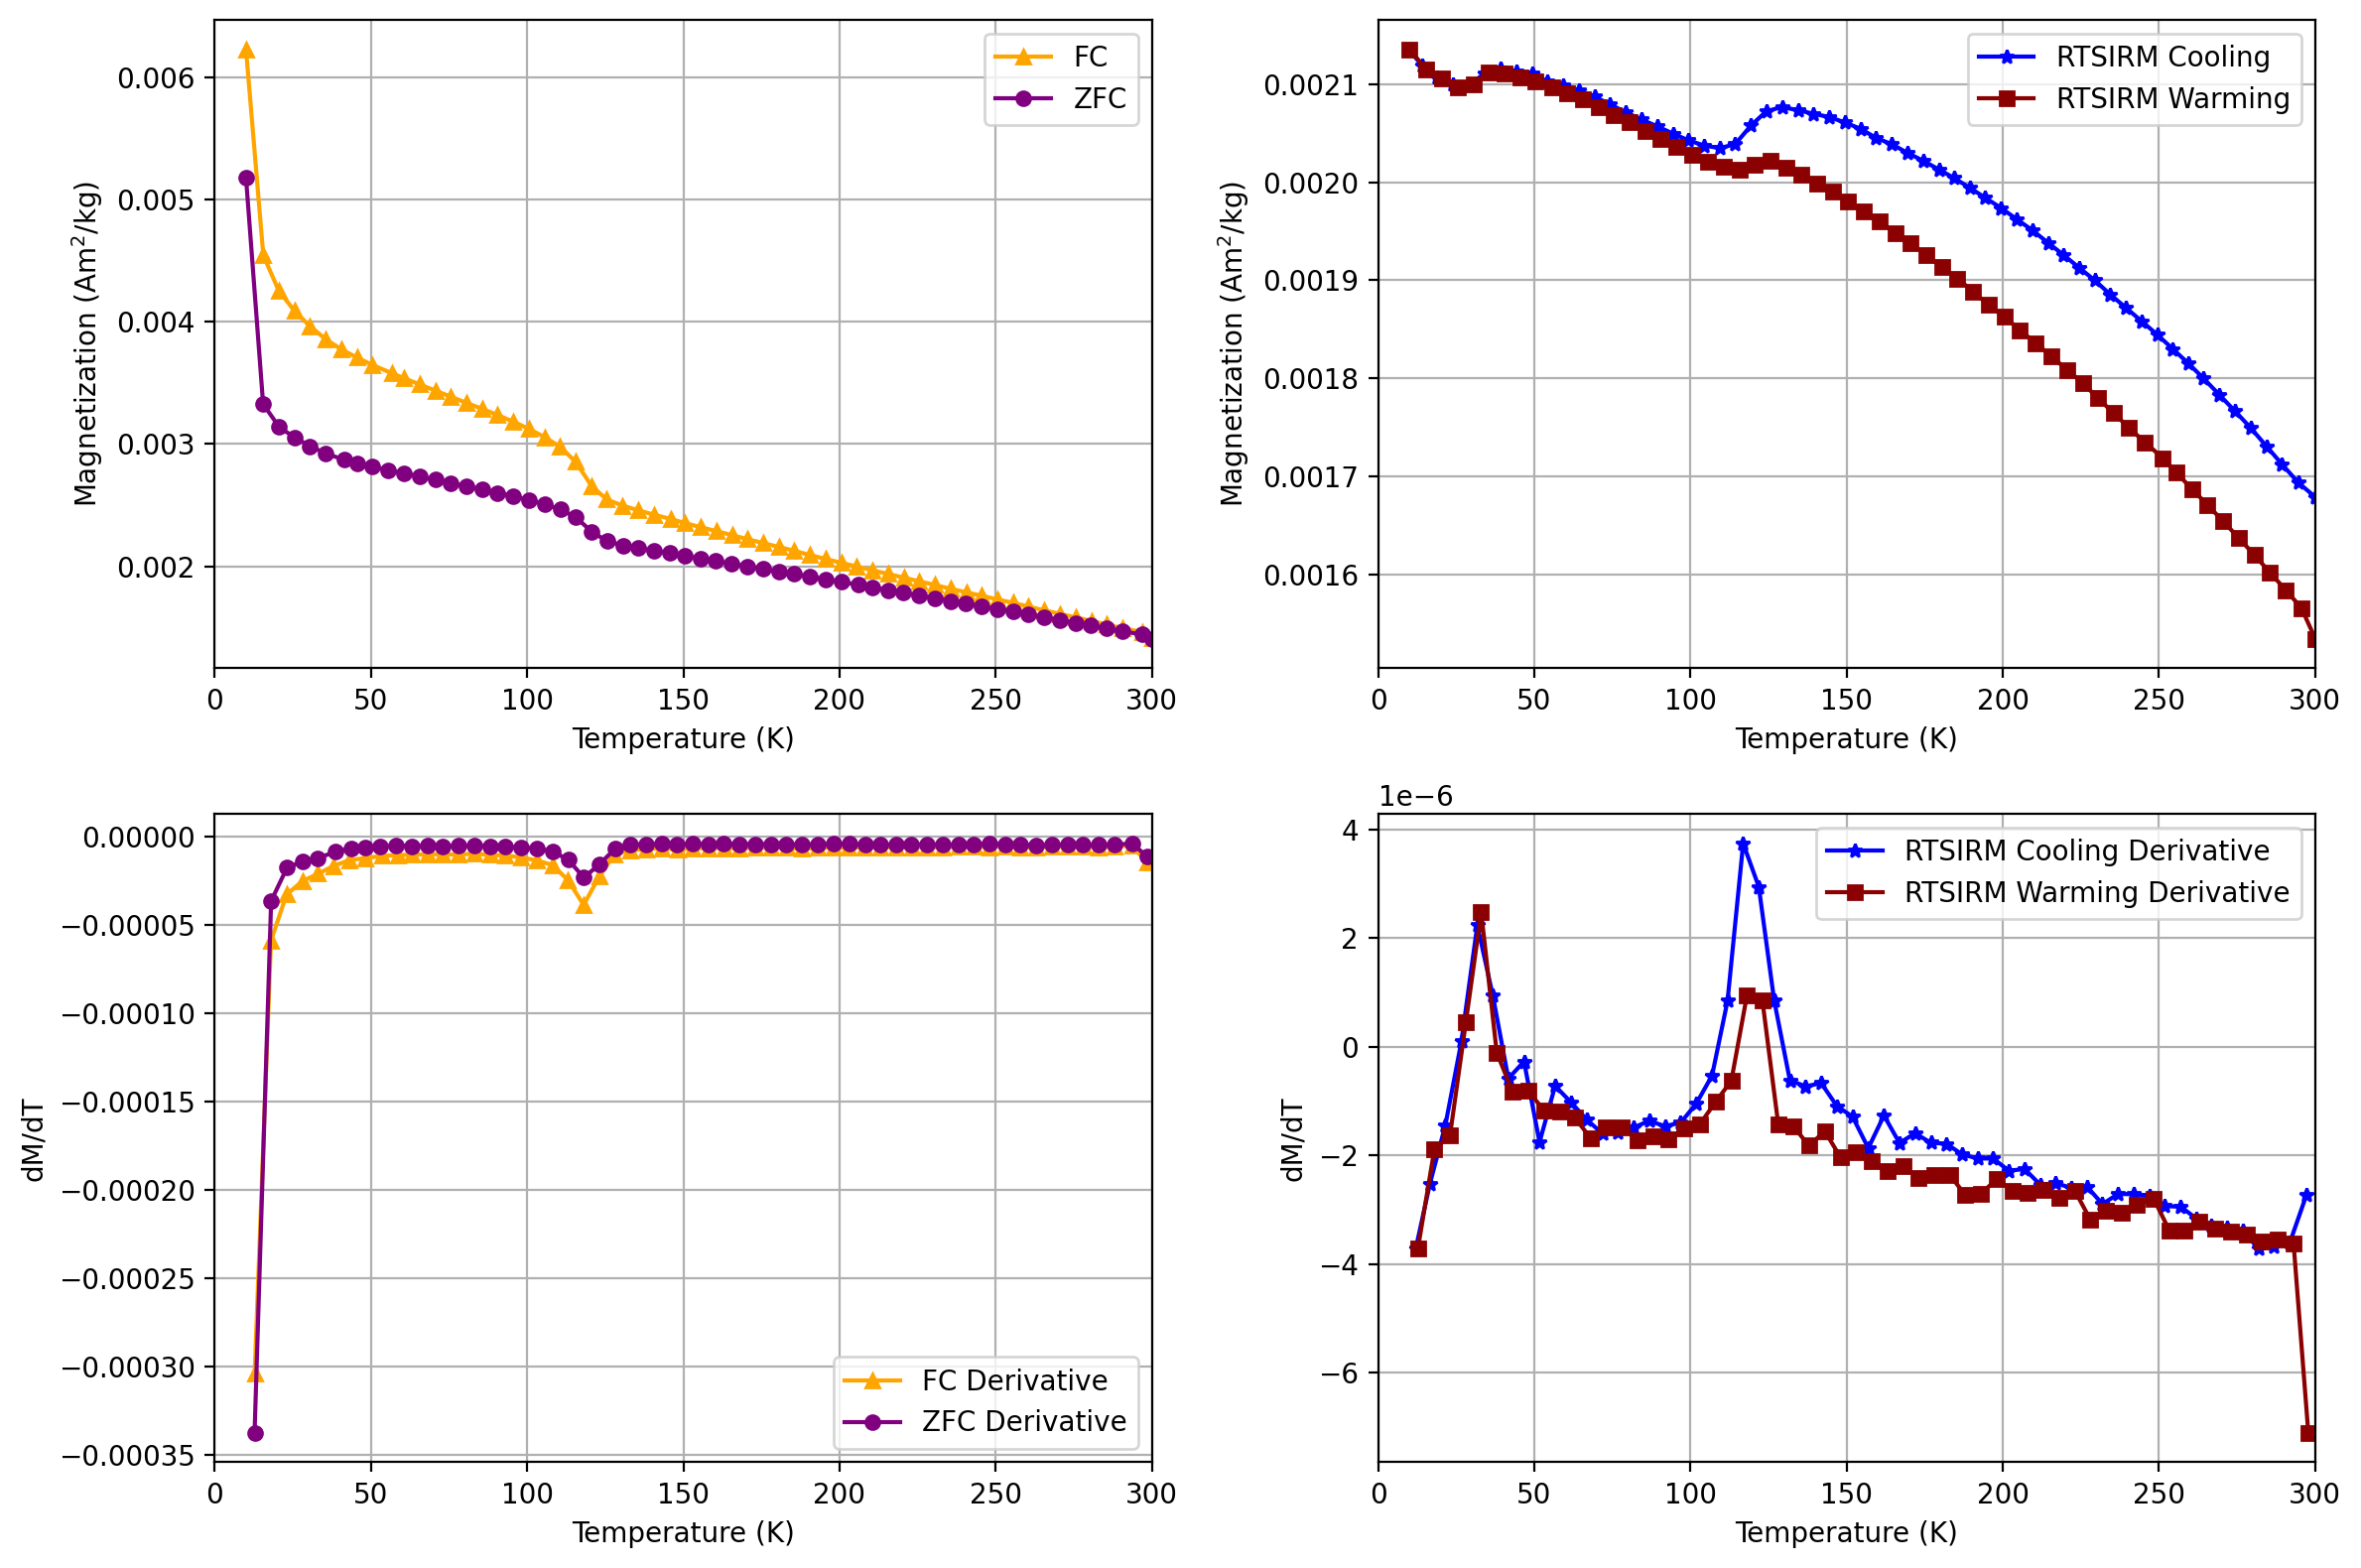

In [13]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, 
                   fc_color='orange', zfc_color='purple', rtsirm_cool_color='blue', rtsirm_warm_color='darkred',
                   fc_marker='^', zfc_marker='o', rtsirm_cool_marker='*', rtsirm_warm_marker='s',
                   symbol_size=5, use_plotly=False, plot_derivative=True)